## Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Data Loading & Pre-Processing
- We load the dataset and clean it

In [41]:
# loads the dataset
df = pd.read_csv("../data/raw/SMSSpamCollection", sep="\t", header=None, names= ["label", "text"], encoding="latin-1")



#BAsic info of dataset
print(df.head())
print(df.label.value_counts())

#convert labels to binary
df["num_label"] = df["label"].map({"ham": 0, "spam": 1})
#
#Train & Test Split
x_train, x_test, y_train, y_test = train_test_split(df["text"], df["num_label"], test_size=0.2, random_state=42, stratify=df["num_label"])


#TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english", lowercase=True, max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

print("TF-IDF shape:", x_train_tfidf.shape)

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64
TF-IDF shape: (4457, 5000)


## Dimension Reduction Using SVD
-

SVD Reduced Shape: (4457, 100)


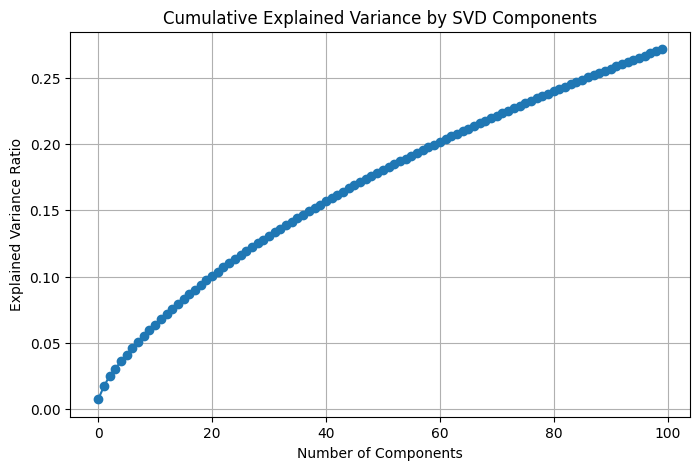

In [42]:
#Reduce to 100 components

svd= TruncatedSVD(n_components=100, n_iter=52)

x_train_svd = svd.fit_transform(x_train_tfidf)
x_test_svd = svd.transform(x_test_tfidf)

print("SVD Reduced Shape:", x_train_svd.shape)

#Variance plot

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(svd.explained_variance_ratio_), marker="o")

plt.title("Cumulative Explained Variance by SVD Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

## Model Training - Logistic Regression With SVD

In [43]:
log_svd = LogisticRegression(max_iter=5000)

log_svd.fit(x_train_svd, y_train)

y_pred_svd = log_svd.predict(x_test_svd)

#print accuracy
print("Accuracy (LogReg + SVD:", accuracy_score(y_test, y_pred_svd))
print(classification_report(y_test, y_pred_svd))


Accuracy (LogReg + SVD: 0.9515695067264573
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.98      0.65      0.78       149

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



### Model Visualization Confusion Matrix

##### How does reducing dimensions affect model accuracy and speed?


-



